In [ ]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=e73e76f940bdcd8f9f8068f21238f7208a00747e5fe671c3413bd3cd9d6f79c0
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
pip install mplfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.2 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Liste des tickers
tickers = ['SMCI', 'MSTR', 'HOOD']

# Télécharger les données pour chaque ticker (open et close)
data = yf.download(tickers, start="2024-03-19", interval="1d")

# Afficher les données avec la colonne du pourcentage quotidien
print(data)

[*********************100%%**********************]  3 of 3 completed

Price       Adj Close                               Close               \
Ticker           HOOD         MSTR        SMCI       HOOD         MSTR   
Date                                                                     
2024-03-19  17.240000  1417.500000  910.969971  17.240000  1417.500000   
2024-03-20  17.889999  1444.060059  877.170105  17.889999  1444.060059   

Price                    High                           Low               \
Ticker            SMCI   HOOD        MSTR   SMCI       HOOD         MSTR   
Date                                                                       
2024-03-19  910.969971  17.83  1450.00000  925.0  16.695000  1230.119995   
2024-03-20  877.170105  17.99  1476.64502  905.5  17.120001  1363.050049   

Price                   Open                             Volume           \
Ticker       SMCI       HOOD         MSTR        SMCI      HOOD     MSTR   
Date                                                                       
2024-03-19  863.0  1

In [ ]:
data.head()

Price       Adj Close                               Close               \
Ticker           HOOD         MSTR        SMCI       HOOD         MSTR   
Date                                                                     
2024-03-19  17.240000  1417.500000  910.969971  17.240000  1417.500000   
2024-03-20  17.889999  1444.060059  877.170105  17.889999  1444.060059   

Price                    High                           Low               \
Ticker            SMCI   HOOD        MSTR   SMCI       HOOD         MSTR   
Date                                                                       
2024-03-19  910.969971  17.83  1450.00000  925.0  16.695000  1230.119995   
2024-03-20  877.170105  17.99  1476.64502  905.5  17.120001  1363.050049   

Price                   Open                             Volume           \
Ticker       SMCI       HOOD         MSTR        SMCI      HOOD     MSTR   
Date                                                                       
2024-03-19  863.0  17.719999  1326.069946  888.609985  14635200  4415500   
2024-03-20  867.0  17.238001  1426.569946  900.000000   4109030  1231149   

Price                 
Ticker          SMCI  
Date                  
2024-03-19  10443800  
2024-03-20   3038490

In [ ]:
data.index

DatetimeIndex(['2024-03-19', '2024-03-20'], dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
data.columns

MultiIndex([('Adj Close', 'HOOD'),
            ('Adj Close', 'MSTR'),
            ('Adj Close', 'SMCI'),
            (    'Close', 'HOOD'),
            (    'Close', 'MSTR'),
            (    'Close', 'SMCI'),
            (     'High', 'HOOD'),
            (     'High', 'MSTR'),
            (     'High', 'SMCI'),
            (      'Low', 'HOOD'),
            (      'Low', 'MSTR'),
            (      'Low', 'SMCI'),
            (     'Open', 'HOOD'),
            (     'Open', 'MSTR'),
            (     'Open', 'SMCI'),
            (   'Volume', 'HOOD'),
            (   'Volume', 'MSTR'),
            (   'Volume', 'SMCI')],
           names=['Price', 'Ticker'])

[*********************100%%**********************]  1 of 1 completed


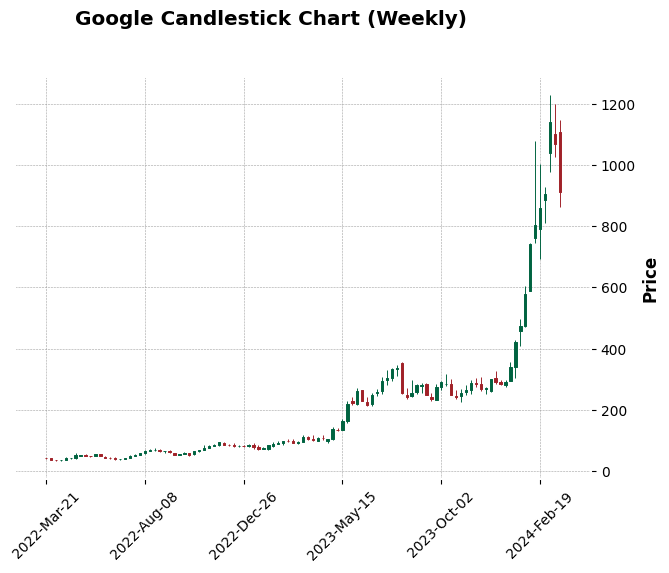

In [ ]:
import yfinance as yf
import mplfinance as mpf

# Télécharger les données pour Google (GOOG)
data = yf.download('SMCI', start='2022-03-19', end='2024-03-19', interval='1wk')

# Créer le graphique en bougies japonaises (candlestick) pour Google sur un graphique weekly
mpf.plot(data, type='candle', style='charles', title='Google Candlestick Chart (Weekly)', ylabel='Price', ylabel_lower='Volume')


[*********************100%%**********************]  1 of 1 completed


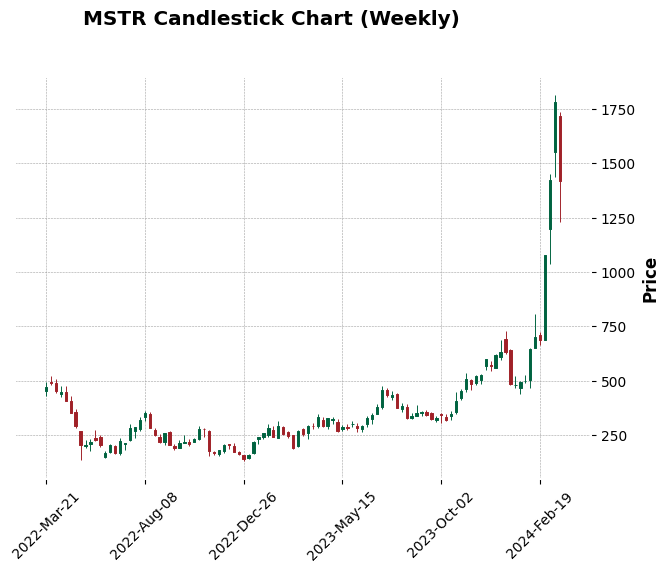

[*********************100%%**********************]  1 of 1 completed


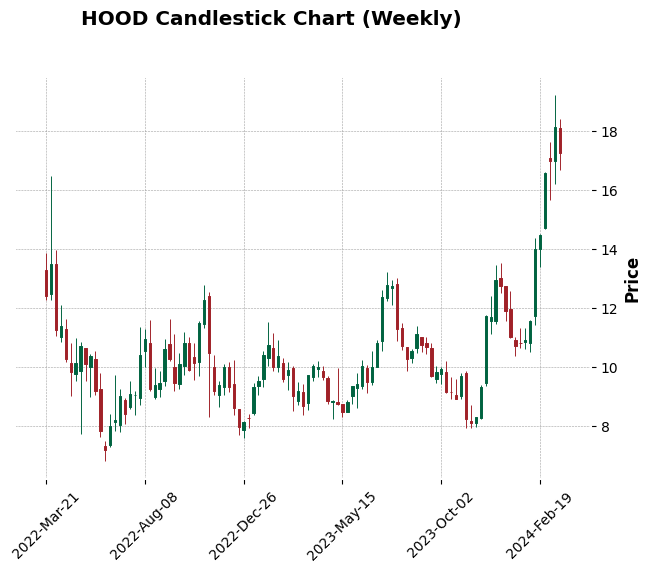

[*********************100%%**********************]  1 of 1 completed


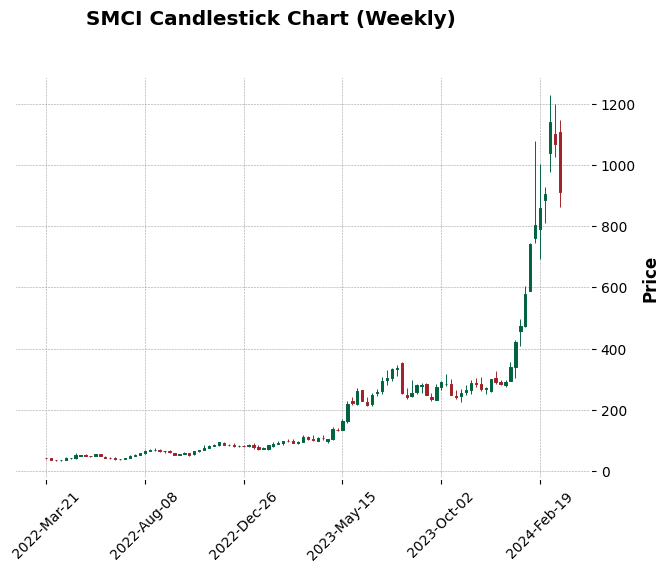

In [ ]:
import yfinance as yf
import mplfinance as mpf

# Liste des tickers des entreprises
tickers = ['MSTR', 'HOOD', 'SMCI']

# Télécharger les données et créer les graphiques en bougies japonaises pour chaque entreprise
for ticker in tickers:
    # Télécharger les données pour chaque entreprise sur une période weekly
    data = yf.download(ticker, start='2022-03-19', end='2024-03-19', interval='1wk')

    # Créer le graphique en bougies japonaises (candlestick) pour chaque entreprise sur un graphique weekly
    mpf.plot(data, type='candle', style='charles', title=f'{ticker} Candlestick Chart (Weekly)', ylabel='Price', ylabel_lower='Volume')


[*********************100%%**********************]  1 of 1 completed


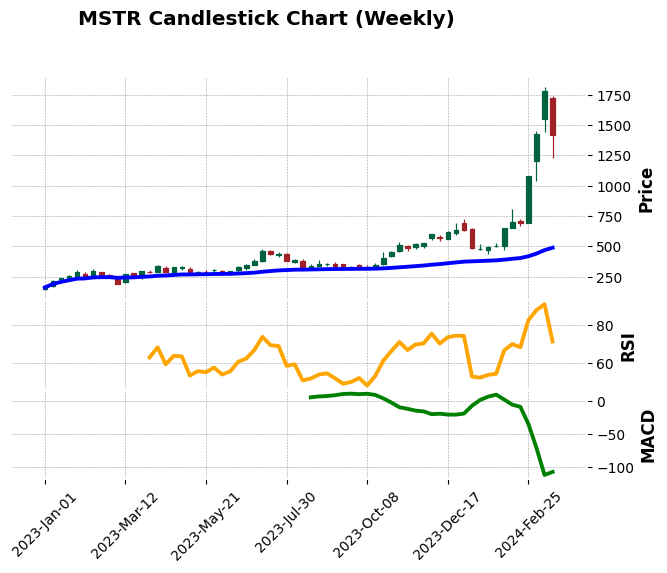

[*********************100%%**********************]  1 of 1 completed


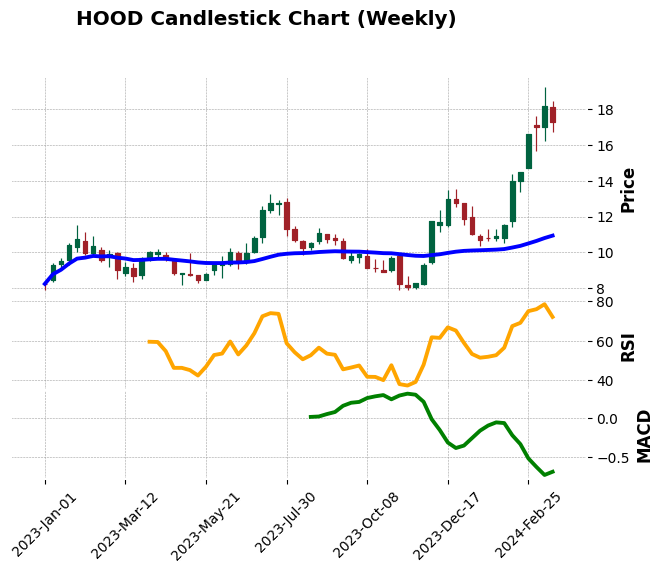

[*********************100%%**********************]  1 of 1 completed


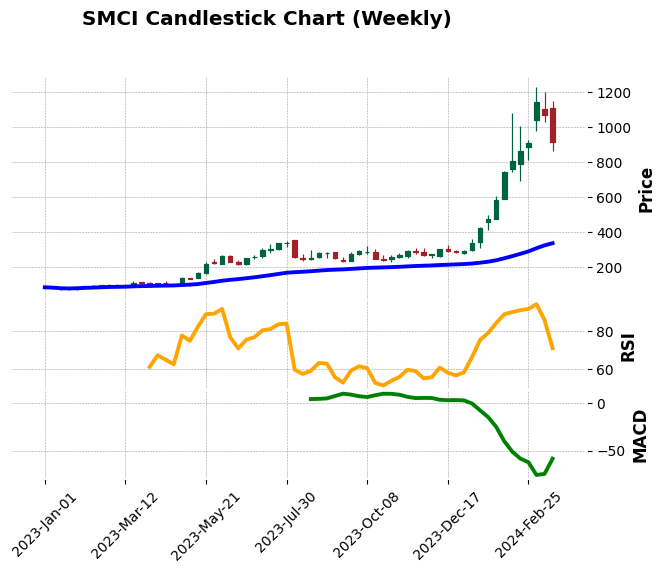

In [ ]:
import yfinance as yf
import mplfinance as mpf
import ta

# Liste des tickers des entreprises
tickers = ['MSTR', 'HOOD', 'SMCI']

# Définir les paramètres des indicateurs techniques
ema_span = 200
macd_params = (12, 26, 9)

# Télécharger les données et créer les graphiques en bougies japonaises pour chaque entreprise
for ticker in tickers:
    # Télécharger les données pour chaque entreprise sur une période weekly
    data = yf.download(ticker, start='2023-01-01', end='2024-03-19', interval='1wk')

    # Calculer les indicateurs techniques
    data['EMA'] = data['Close'].ewm(span=ema_span).mean()
    data['RSI'] = ta.momentum.rsi(data['Close'], window=14)
    data['MACD'] = ta.trend.macd_diff(data['Close'], *macd_params)

    # Créer le graphique en bougies japonaises (candlestick) pour chaque entreprise sur un graphique weekly
    mpf.plot(data, type='candle', style='charles', title=f'{ticker} Candlestick Chart (Weekly)',
             ylabel='Price', ylabel_lower='Volume', mav=(ema_span,),
             addplot=[mpf.make_addplot(data['EMA'], color='blue'),  # EMA 200
                      mpf.make_addplot(data['RSI'], panel=1, color='orange', ylabel='RSI'),  # RSI 14
                      mpf.make_addplot(data['MACD'], panel=2, color='green', ylabel='MACD')])  # MACD

